In [307]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
import scipy as sp
import scipy.linalg as spl
import matplotlib.pyplot as plt
import SolveTriangular

## Esame di Metodi Numerici 6 Maggio 2024

## Esercizo 1

- Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file `'test_14_09_2023.mat'`. Risolvere il sistema confrontando almeno due tra i metodi visti per utilizzare per risolvere il sistema lineare con tale matrice dei coefficienti. Confrontare i risultati dei vari metodi, e giustificare i loro comportamento utilizzando i risultati teorici visti a lezione.
- Per la lettura dei dati procedere nel seguente modo:

`from scipy.io import loadmat`

`import numpy as np`

`dati = loadmat('test_06_05_2024.mat')`

`A=dati["A"] `

`A=A.astype(float)`

`b=dati["b"]`

` b=b.astype(float)`

                                       [10 punti]


In [308]:
dati = loadmat("test_06_05_2024.mat")
A = dati["A"]
A = A.astype(float)
b = dati["b"]
b = b.astype(float)

In [309]:
n, m = A.shape
size = n * m
non_zeros = np.count_nonzero(A)

print(f"Dimensioni: {n}x{m}")
print("Simmetrica:", np.all(A.T == A))
print("Definita positiva:", np.all(npl.eigvals(A) > 0))
print("Sparsa:", non_zeros / size < 0.33)

Dimensioni: 400x400
Simmetrica: True
Definita positiva: True
Sparsa: True


In [310]:
def steepestdescent(A, b, x0, itmax, tol):

    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return [], []

    # inizializzare le variabili necessarie
    x = x0

    r = A @ x - b
    p = -r
    it = 0
    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r) / nb
    vec_sol = []
    vec_sol.append(x)
    vet_r = []
    vet_r.append(errore)

    # utilizzare il metodo del gradiente per trovare la soluzione
    while it < itmax and errore >= tol:
        it = it + 1
        Ap = A @ p

        alpha = -(r.T @ p) / (p.T @ Ap)
        x = x + alpha * p

        vec_sol.append(x)
        r = r + alpha * Ap
        errore = np.linalg.norm(r) / nb
        vet_r.append(errore)
        p = -r

    return x, vet_r, vec_sol, it

In [311]:
def conjugate_gradient(A, b, x0, itmax, tol):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return [], []

    # inizializzare le variabili necessarie
    x = x0

    r = A @ x - b
    p = -r
    it = 0

    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r) / nb
    vec_sol = []
    vec_sol.append(x0)
    vet_r = []
    vet_r.append(errore)

    # utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it < itmax:
        it = it + 1
        Ap = A @ p
        alpha = (r.T @ r) / (p.T @ Ap)
        x = x + alpha * p
        vec_sol.append(x)
        rtr_old = r.T @ r
        r = r + alpha * Ap
        gamma = (r.T @ r) / rtr_old
        errore = np.linalg.norm(r) / nb
        vet_r.append(errore)
        p = -r + gamma * p

    return x, vet_r, vec_sol, it

Iterazioni steep: 100
Iterazioni conj: 44


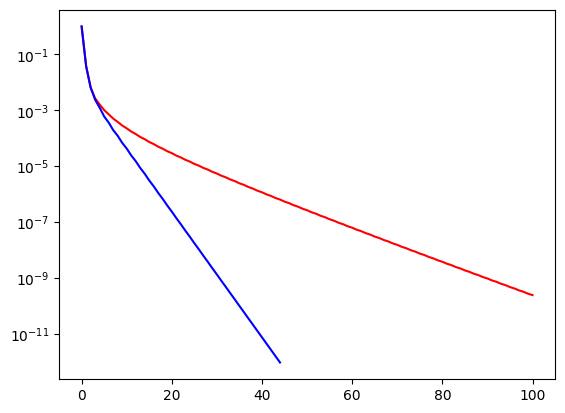

In [312]:
x0 = np.zeros_like(b)
it_max = 100
tol = 1e-12

x_steep, vet_err_steep, vec_sol_steep, it_steep = steepestdescent(A, b, x0, it_max, tol)
x_conj, vet_err_conj, vec_sol_conj, it_conj = conjugate_gradient(A, b, x0, it_max, tol)

print("Iterazioni steep:", it_steep)
print("Iterazioni conj:", it_conj)

plt.semilogy(
    range(it_steep + 1), vet_err_steep, "r-", range(it_conj + 1), vet_err_conj, "b-"
)

- Data la matrice

  $$
  A=\left[
  \begin{array}{cccc}
  1 & 2 & 3 & 4\\
  2 & -4 & 6 & 8\\
  -1 & -2 & -3 & -1\\
  5 & 7 & 0 & 1
  \end{array}
  \right ],
  $$

  Richiamare le ipotesi sotto cui esiste la fattorizzazione di Gauss senza pivoting e scrivere un codice per verificarle.

                                                  [2 punti]


> Per poter effettuare la fattorizzazione di Gauss senza pivoting è necessario che tutte le sottomatrici di testa siano non singolari


In [313]:
A = np.array([[1, 2, 3, 4], [2, -4, 6, 8], [-1, -2, -3, -1], [5, 7, 0, 1]])

test_sing = np.all(
    np.array([npl.det(A[:k, :k]) for k in range(1, A.shape[0] + 1)]) != 0
)
print("Sotto matrici di testa non singolari:", test_sing)

Sotto matrici di testa non singolari: False


## Esercizio 2

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange, $n=5,10,15,18$

- nodi $x_i$, punti equidistanti in un intervallo $[a, b]$,
- nodi $x_i$, zeri dei polinomi di Chebyshev nell'intervallo $[a, b]$, ossia

  $$
  x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
  \frac{(2i+1)\pi}{2(n + 1)}
  \right), \quad  i =0, ..., n
  $$

  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ della funzione test $f: \ [a, b] \rightarrow {\mathbb R}$.

  - $f(x) = 1/(1+25*x^2)$, $ \quad x \in [-1, 1]$ (funzione di Runge).

                                          [6] punti


In [314]:
def plagr(xnodi, j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri = np.zeros_like(xnodi)
    n = xnodi.size
    if j == 0:
        xzeri = xnodi[1:n]
    else:
        xzeri = np.append(xzeri[:j], xzeri[j + 1:n])

    num = np.poly(xzeri)
    den = np.polyval(num, xnodi[j])

    p = num / den

    return p

In [315]:
def InterpL(x, y, xx):
    """ "
    %funzione che determina in un insieme di punti il valore del polinomio
    %interpolante ottenuto dalla formula di Lagrange.
    % DATI INPUT
    %  x  vettore con i nodi dell'interpolazione
    %  f  vettore con i valori dei nodi
    %  xx vettore con i punti in cui si vuole calcolare il polinomio
    % DATI OUTPUT
    %  y vettore contenente i valori assunti dal polinomio interpolante
    %
    """
    n = x.size
    m = xx.size
    L = np.zeros((m, n))
    for j in range(n):
        p = plagr(x, j)
        L[:, j] = np.polyval(p, xx)

    return L @ y

In [316]:
def zeri_cheb(a,b,n):
    t1=(a+b)/2
    t2=(b-a)/2
    x=np.zeros((n+1,))

    for k in range(n+1):
        x[k]=t1+t2*np.cos(((2*k+1)/(2*(n+1))*np.pi))
    return x

In [317]:
n = 15
a = -1
b = 1

x_eq = np.linspace(a, b, n+1)
x_cheb = zeri_cheb(a, b, n)
xx = np.linspace(a, b, 100)

f = lambda x: 1/(1+25*x**2)
y_eq = f(x_eq)
y_cheb = f(x_cheb)
y_fun = f(xx)

- Calcolare l'errore di interpolazione $r(x) =  f(x)-pe(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $pe(x)$ calcolato a partire da nodi equdisitanti.

								[1] punto


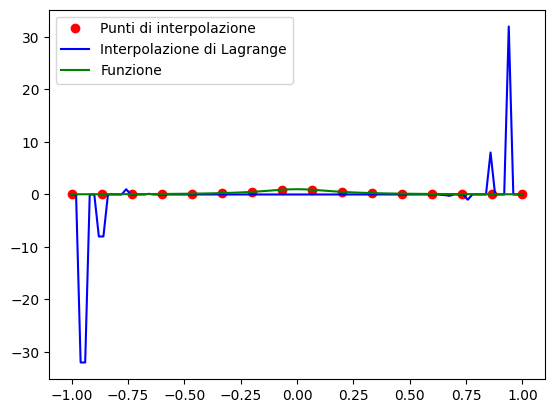

In [318]:
yy_eq = InterpL(x_eq, y_eq, xx)

plt.plot(x_eq, y_eq, 'ro', xx, yy_eq, 'b-', xx, y_fun, 'g-')
plt.legend(['Punti di interpolazione', 'Interpolazione di Lagrange', 'Funzione'])

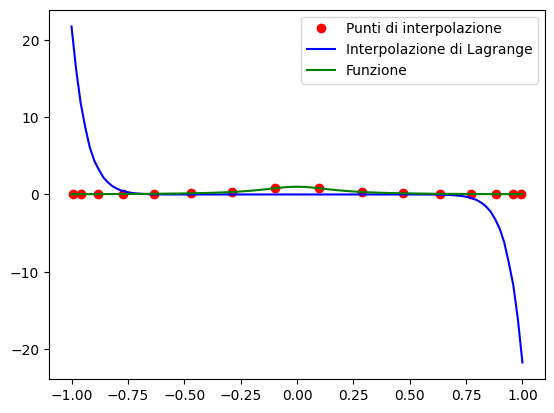

In [319]:
yy_cheb = InterpL(x_cheb, y_cheb, xx)

plt.plot(x_cheb, y_cheb, 'ro', xx, yy_cheb, 'b-', xx, y_fun, 'g-')
plt.legend(['Punti di interpolazione', 'Interpolazione di Lagrange', 'Funzione'])

In [320]:
r_eq = np.abs(y_fun - yy_eq)


Visualizzare il grafico di $f(x)$ e $pe(x)$, ed il grafico di $|r(x)|$ per ogni valore $n=5,10,15,18$

                                        [1] punto

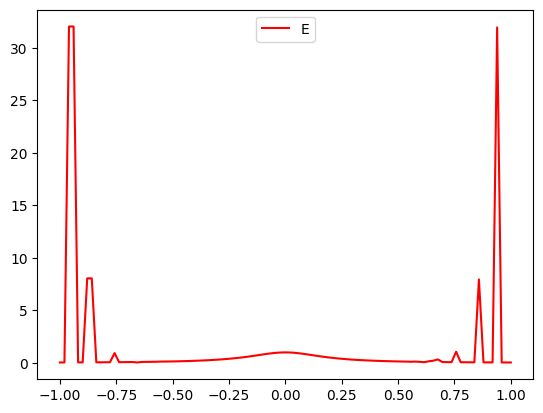

In [321]:
plt.plot(xx, r_eq, 'r-')
plt.legend("Errore interpolazione punti equidistanti")


Calcolare l'errore di interpolazione $r(x) =  f(x)-pc(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$ calcolato a partire da nodi di Chebichev.

                                      [1] punto

In [322]:
r_cheb = np.abs(y_fun - yy_cheb)


Visualizzare il grafico di $f(x)$ e $pc(x)$, ed il grafico di $|r(x)|$.

                                       [1] punto

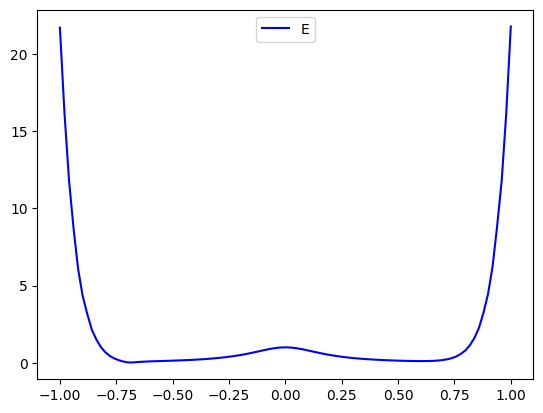

In [323]:
plt.plot(xx, r_cheb, 'b-')
plt.legend("Errore interpolazione punti chebichev")


Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$? Scrivere la formula dell'errore che si compie quando al posto della funzione che ha generato i dati si considera il polinomio interpolatore di grado n e commentarla.

                                         [3 punti]


**Domanda AI**


- Descrivere gli elementi caratterizzanti di un MultiLayer Perceptron (MLP).( Com'è fatto un neurone artificiale, a caso servono le funzioni di attivazione, come sono organizzati i neuroni. Varie tipologie di reti MLP) ed accennare in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**

- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch. **Punti 1**
- Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**
- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
- Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**

**Totale: 7**
